# Aim

1. This notebook is aimed towards getting correlation in between features

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.options.mode.chained_assignment = None

In [2]:
import json

with open("../data/feature-meta/cleaned/meta.json") as f:
    feature_meta = json.load(f)

feature_meta

{'customerID': {'is_raw': True, 'type': 'ID'},
 'gender': {'is_raw': True, 'var_type': 'boolean', 'value_type': 'text'},
 'SeniorCitizen': {'is_raw': True,
  'var_type': 'boolean',
  'value_type': 'numeric'},
 'Partner': {'is_raw': True, 'var_type': 'boolean', 'value_type': 'text'},
 'Dependents': {'is_raw': True, 'var_type': 'boolean', 'value_type': 'text'},
 'tenure': {'is_raw': True, 'var_type': 'real', 'value_type': 'numeric'},
 'PhoneService': {'is_raw': True, 'var_type': 'boolean', 'value_type': 'text'},
 'MultipleLines': {'is_raw': True,
  'var_type': 'categorical',
  'value_type': 'text'},
 'InternetService': {'is_raw': True,
  'var_type': 'categorical',
  'value_type': 'text'},
 'OnlineSecurity': {'is_raw': True,
  'var_type': 'categorical',
  'value_type': 'text'},
 'OnlineBackup': {'is_raw': True,
  'var_type': 'categorical',
  'value_type': 'text'},
 'DeviceProtection': {'is_raw': True,
  'var_type': 'categorical',
  'value_type': 'text'},
 'TechSupport': {'is_raw': True,
 

In [3]:
df = pd.read_parquet(f"../data/cleaned/telcom-churn.parquet")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Correlation heatmap

[reference](https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas)

1. We generally remove highly correlated features
1. Reason say if x (input feature), y (target) are highly correlated
1. We might miss out on some other explanatory feature
1. Chances are we might not learn the target variable well enough due to this highly correlated feature

In [4]:
categorical_features = []
for feature in feature_meta:
    if feature_meta[feature].get("var_type", -1) in ["boolean", "categorical"]:
        categorical_features.append(feature)

In [5]:
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [6]:
real_features = []
for feature in feature_meta:
    if feature_meta[feature].get("var_type", -1) in ["real"]:
        real_features.append(feature)

In [7]:
real_features

['tenure', 'MonthlyCharges', 'TotalCharges']

Convert categorical features into encoded format for getting correlation

In [8]:
df_encoded = df[categorical_features].apply(lambda x: pd.factorize(x)[0])
df_encoded

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,1,0
2,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,0,0,0,1,1,1,1,0,0,1,1,2,0
4,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,1,2,0,1,1,1,1,1,1,1,0,1,0
7039,0,0,0,1,1,2,1,0,0,1,0,1,1,1,0,3,0
7040,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
7041,1,1,0,0,1,2,1,0,1,0,0,0,0,0,0,1,1


In [9]:
df_real = df[real_features]
df_real

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [10]:
df_req = pd.concat([df_encoded, df_real], axis=1,)
df_req

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,29.85,29.85
1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,1,0,34,56.95,1889.50
2,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1,2,53.85,108.15
3,1,0,1,0,0,0,0,1,1,1,1,0,0,1,1,2,0,45,42.30,1840.75
4,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,1,2,0,1,1,1,1,1,1,1,0,1,0,24,84.80,1990.50
7039,0,0,0,1,1,2,1,0,0,1,0,1,1,1,0,3,0,72,103.20,7362.90
7040,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,11,29.60,346.45
7041,1,1,0,0,1,2,1,0,1,0,0,0,0,0,0,1,1,4,74.40,306.60


Plot correlation between features

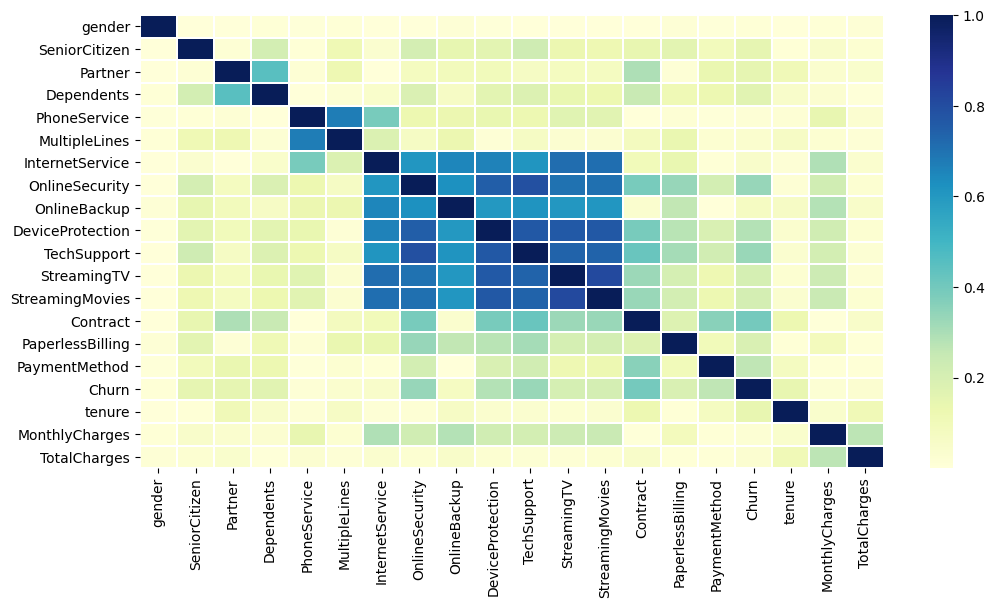

In [11]:
plt.figure(figsize=(12, 6), dpi=100)

corr = df_req.apply(lambda x: pd.factorize(x)[0]).corr()
corr = corr.abs()
ax = sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    linewidths=0.2,
    cmap="YlGnBu",
)

We can see that there is high correlation in:

1. `StreamingMovies` and `[InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingMovies]`

Getting upper triangular matrix excluding the diagonal

In [12]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
upper.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
gender,NaN,0.001874,0.001808,0.010517,0.006488,0.009451,0.000863,0.003429,0.012230,0.005092,0.000985,0.001156,0.000191,0.000126,0.011754,0.005209,0.008612,0.000013,0.008072,0.012302
SeniorCitizen,NaN,NaN,0.016479,0.211185,0.008576,0.113791,0.032310,0.210897,0.144828,0.157095,0.223770,0.130130,0.120802,0.142554,0.156530,0.093704,0.150889,0.010834,0.049649,0.023880
Partner,NaN,NaN,NaN,0.452676,0.017706,0.117307,0.000891,0.081850,0.090753,0.094451,0.069072,0.080127,0.075779,0.294806,0.014877,0.133115,0.150448,0.101985,0.036054,0.042628
Dependents,NaN,NaN,NaN,NaN,0.001762,0.019657,0.044590,0.190523,0.062775,0.156439,0.180832,0.140395,0.125820,0.243187,0.111377,0.123844,0.164221,0.048514,0.029390,0.006300
PhoneService,NaN,NaN,NaN,NaN,NaN,0.675070,0.387436,0.125353,0.129770,0.138755,0.123350,0.171538,0.165205,0.002247,0.016505,0.004070,0.011942,0.018799,0.141829,0.029806


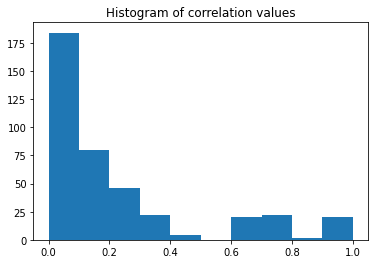

In [13]:
plt.figure()
plt.title("Histogram of correlation values")
plt.hist(np.hstack(corr.values))
plt.show()

In [14]:
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
to_drop

['StreamingMovies']

In [15]:
df.drop(columns=to_drop, inplace=True)
df.to_parquet("../data/cleaned/telcom-churn-rm-corr.parquet")